## MNIST DATASET PCA 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<a href="https://datahub.io/machine-learning/mnist_784#resource-mnist_784" style="color:red"><b> MNIST DATASET DOWNLOAD</a>


In [2]:
mnist_df = pd.read_csv("mnist_784.csv")
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### There are  1 label and 784 feature columns. In this study we will look at the variances of these columns. After applying PCA we will see most of these features are redundant. 

In [3]:
mnist_df.info()   

#all numeric values, no categoric values (computers does not love categoric data because they don't understand)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [4]:
mnist_df['class'].value_counts()   #unique count of the classes(label data: 0-9)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [5]:
X = mnist_df.drop(labels='class', axis=1)      #obtain the features from the raw data as X

In [6]:
y =  pd.DataFrame(mnist_df['class'])     #obtain the label from the raw data as y

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y,shuffle= True, stratify =y, test_size=0.3, random_state=42)

# "stratify = y" guarantees the train data label(output) percentage as the raw data (we will see it later)
# test_size=0.3 means that the train percentage is 70%. You can use 80%, 90% percentages as the train data..

In [8]:
y.value_counts()

class
1        7877
7        7293
3        7141
2        6990
9        6958
0        6903
6        6876
8        6825
4        6824
5        6313
dtype: int64

In [9]:
df_control_stratify = pd.DataFrame(y.value_counts(normalize=True, sort=False), columns =  ['class_y'])
df_control_stratify

,class_y
class,
0,0.098614
1,0.112529
2,0.099857
3,0.102014
4,0.097486
5,0.090186
6,0.098229
7,0.104186
8,0.097500


In [10]:
df_control_stratify ['class_ytrain']= pd.DataFrame(y_train.value_counts(normalize=True, sort=False))
df_control_stratify

# normalized version, very close percentages

,class_y,class_ytrain
class,,
0,0.098614,0.098612
1,0.112529,0.112531
2,0.099857,0.099857
3,0.102014,0.102020
4,0.097486,0.097490
5,0.090186,0.090184
6,0.098229,0.098224
7,0.104186,0.104184
8,0.097500,0.097490


## Scale Before PCA

In [11]:
scale_minmax = MinMaxScaler()
X_train_scaled = scale_minmax.fit_transform(X_train)
X_test_scaled = scale_minmax.transform(X_test)     
#never fit test data while scaling, it causes data leakege

# we have to scale data before PCA

## Apply PCA

In [12]:
pca = PCA(n_components=len(X_train.columns))   # we implement PCA to all the dimensions to see the percentage change of the variance
pca.fit(X_train_scaled)
pca.transform(X_train_scaled)
pca.transform(X_test_scaled)

pca_df = pd.DataFrame(range(1,len(X.columns)+1), columns= ["Number of Components"])
pca_df = pd.DataFrame(100*pca.explained_variance_ratio_.round(decimals=6), columns= ["Principal Components"])
pca_df.index += 1

pca_df = pd.DataFrame(range(1,len(X.columns)+1), columns= ["Number of Components"])
pca_df ["Principal Components"] = 100*pca.explained_variance_ratio_.round(decimals=6)
pca_df

,Number of Components,Principal Components
0,1,9.7393
1,2,7.1278
2,3,6.1400
3,4,5.4216
4,5,4.8883
...,...,...
779,780,0.0000
780,781,0.0000
781,782,0.0000
782,783,0.0000


In [13]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_*100)
pca_df['PC Cumulative'] = pca_cumsum.round(decimals=4)
pca_df
# if component is 1, the percentage is 9.74%
# if component is 5, the percentage reaches to 33.34%.... and so on

,Number of Components,Principal Components,PC Cumulative
0,1,9.7393,9.7393
1,2,7.1278,16.8671
2,3,6.1400,23.0071
3,4,5.4216,28.4286
4,5,4.8883,33.3170
...,...,...,...
779,780,0.0000,100.0000
780,781,0.0000,100.0000
781,782,0.0000,100.0000
782,783,0.0000,100.0000


In [14]:
pca_df.to_html('mnist data_PCA example.html')  #we save the results as html file..

## How to decide the optimum component number?

In [15]:
pca_df.head()

,Number of Components,Principal Components,PC Cumulative
0,1,9.7393,9.7393
1,2,7.1278,16.8671
2,3,6.1400,23.0071
3,4,5.4216,28.4286
4,5,4.8883,33.3170


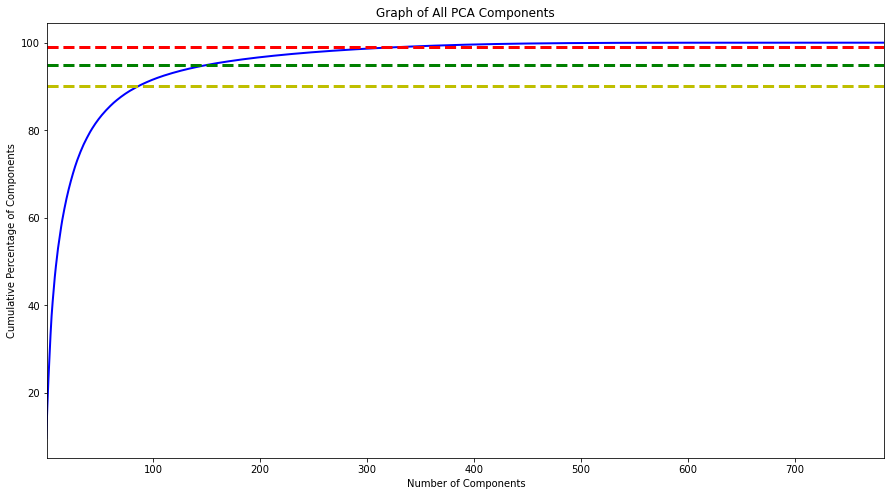

In [16]:
plt.figure(figsize=(15, 8))
#plt.ylim(0 , 120, 5)
plt.xlim(1 , len(pca_df), 5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Percentage of Components')
plt.title('Graph of All PCA Components')

#plt.margins(x=0, y=0)
#plt.margins()

#plt.plot(pca_df.index.values, pca_df['PC Cumulative'], 'bo-')
plt.plot(pca_df.index.values, pca_df['PC Cumulative'], 'b', lw=2)
plt.axhline(90, ls="--",lw = '3', c='y')
plt.axhline(95, ls="--", lw = '3', c='g')
plt.axhline(99, ls="--", lw = '3', c='r')
#plt.xticks(pca_df.index.values)

plt.show()

### In Matplotlib graph we do not see variance and component numbers well. Let's use plotly express graph.

In [17]:
fig = px.line(pca_df, x= "Number of Components" , y= 'PC Cumulative', title="Graph of All PCA Components")
fig.update_traces(mode="markers+lines", line_color ='blue', hovertemplate=None)
fig.update_layout(hovermode="x",autosize=False, width=900, height=600)
fig.update_xaxes(showspikes=True)
fig.update_yaxes(showspikes=True)

fig.show(render='svg')

### For 99 percentage variance, we can choose 331 components.

In [18]:
pca_df.iloc[328:335, :] 
# we look at the components from 329 to 335 to see the 331 components's variance ratio

,Number of Components,Principal Components,PC Cumulative
328,329,0.0111,98.9825
329,330,0.0110,98.9935
330,331,0.0110,99.0045
331,332,0.0109,99.0154
332,333,0.0108,99.0262
333,334,0.0107,99.0369
334,335,0.0106,99.0475


In [19]:
pca_df_style = pca_df.iloc[328:335, :].style.set_table_styles([
                                    { "selector" :".row2",
                                        "props": [("color", "black"), ("background-color", "yellow")]
                                    } ] )
pca_df_style

,Number of Components,Principal Components,PC Cumulative
328,329,0.011100,98.982500
329,330,0.011000,98.993500
330,331,0.011000,99.004500
331,332,0.010900,99.015400
332,333,0.010800,99.026200
333,334,0.010700,99.036900
334,335,0.010600,99.047500


## CONCLUSION

#### In this study, we have MNIST dataset with 784 features. We have a chance to reduce all these dimensions to an optimum value by PCA. After PCA, we have to decide the optimum components. We made a graph and a dataframe colored yellow. If you look at the graphs and the last dataframe, 331 components represent the 99% percent of the whole data. If we decide the 99% of the variance is sufficient, we can take 331 features for our classification problem, not all the features (784 features). PCA can reduce the dimensions substantially by preserving most of the variance(for example 99%).